In [1]:
!pip install seaborn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv("data.csv")

In [3]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Perform EDA

In [4]:
data.shape

(7043, 21)

In [5]:
data.info() # we can see that all the columns are non null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [7]:
# drop customer id column as it serves no importance for our analysis

In [8]:
data.drop(columns=["customerID"], inplace= True)

In [9]:
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [10]:
data.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

#check if the values in each colun and their datatype matches or not, we can see that montly charges is float 
but Total charges is object, convert total charges to float

In [11]:
data.TotalCharges=pd.to_numeric(data.TotalCharges, errors="coerce")
data.dtypes["TotalCharges"]



dtype('float64')

In [12]:
data.isnull().sum()




gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [13]:
#view the rows with missing values
mis_val=data[data["TotalCharges"].isnull()]
print(mis_val) #all the Nan values must be handled

      gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
488   Female              0     Yes        Yes       0           No   
753     Male              0      No        Yes       0          Yes   
936   Female              0     Yes        Yes       0          Yes   
1082    Male              0     Yes        Yes       0          Yes   
1340  Female              0     Yes        Yes       0           No   
3331    Male              0     Yes        Yes       0          Yes   
3826    Male              0     Yes        Yes       0          Yes   
4380  Female              0     Yes        Yes       0          Yes   
5218    Male              0     Yes        Yes       0          Yes   
6670  Female              0     Yes        Yes       0          Yes   
6754    Male              0      No        Yes       0          Yes   

         MultipleLines InternetService       OnlineSecurity  \
488   No phone service             DSL                  Yes   
753                 N

In [14]:
data["TotalCharges"].fillna(0,inplace=True)

In [15]:
#filled=data[data["TotalCharges"]==0]
#print(filled) 

Now convert categorical columns to boolean values(0 or 1) for yes and no 

In [16]:
print({col: data[col].unique() 
       for col in ["Contract", "PaymentMethod"]})

{'Contract': array(['Month-to-month', 'One year', 'Two year'], dtype=object), 'PaymentMethod': array(['Electronic check', 'Mailed check', 'Bank transfer (automatic)',
       'Credit card (automatic)'], dtype=object)}


In [17]:
data["gender"] = data["gender"].map({"Female":0, "Male":1})
#data["Dependents"] = data["Dependents"].map({"Yes":1, "No":0})
#data["PhoneService"] = data["PhoneService"].map({"Yes":1, "No":0})
#data["Partner"] = data["Partner"].map({"Yes":1, "No":0})
#data["PaperlessBilling"] = data["PaperlessBilling"].map({"Yes":1, "No":0})
data["MultipleLines"] = data["MultipleLines"].map({"Yes":1, "No":0, "No phone service":-1})
data["Churn"] = data["Churn"].map({"Yes":1, "No":0})

In [18]:
data[["gender","PhoneService","Partner","PaperlessBilling", "Churn"]].head()

,gender,PhoneService,Partner,PaperlessBilling,Churn
0,0,No,Yes,Yes,0
1,1,Yes,No,No,0
2,1,Yes,No,Yes,1
3,1,No,No,No,0
4,0,Yes,No,Yes,1


In [19]:
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,Yes,No,1,No,-1,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,1,0,No,No,34,Yes,0,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,1,0,No,No,2,Yes,0,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,1,0,No,No,45,No,-1,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,0,0,No,No,2,Yes,0,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


In [20]:
print({col: data[col].unique() 
       for col in ["Contract", "PaymentMethod", "OnlineSecurity", "OnlineBackup", "StreamingTV", "StreamingMovies"]})

{'Contract': array(['Month-to-month', 'One year', 'Two year'], dtype=object), 'PaymentMethod': array(['Electronic check', 'Mailed check', 'Bank transfer (automatic)',
       'Credit card (automatic)'], dtype=object), 'OnlineSecurity': array(['No', 'Yes', 'No internet service'], dtype=object), 'OnlineBackup': array(['Yes', 'No', 'No internet service'], dtype=object), 'StreamingTV': array(['No', 'Yes', 'No internet service'], dtype=object), 'StreamingMovies': array(['No', 'Yes', 'No internet service'], dtype=object)}


In [21]:
data["Contract"] = data["Contract"].map({"Month-to-month":0, "One year":1, "Two year":-1})
data["InternetService"] = data["InternetService"].map({"No":0, "DSL":1, "Fiber optic":-1})
data["PaymentMethod"] = data["PaymentMethod"].map({"Electronic check":0, "Mailed check":1, "Bank transfer (automatic)":-1,"Credit card (automatic)":0.5})

In [22]:
#We can see many of the columns has values yes, no and no internet service convert to 0,1 and -1 use lambda function (keep it between 0 and 1 ) so that it would be easy for corr matrix

In [23]:
dataf = data.applymap(lambda x: 1 if x == "Yes" else (0 if x == "No" else (-1 if x == "No internet service" else x)))


In [24]:
dataf.head(10)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,-1,1,0,1,0,0,0,0,0,1,0.0,29.85,29.85,0
1,1,0,0,0,34,1,0,1,1,0,1,0,0,0,1,0,1.0,56.95,1889.50,0
2,1,0,0,0,2,1,0,1,1,1,0,0,0,0,0,1,1.0,53.85,108.15,1
3,1,0,0,0,45,0,-1,1,1,0,1,1,0,0,1,0,-1.0,42.30,1840.75,0
4,0,0,0,0,2,1,0,-1,0,0,0,0,0,0,0,1,0.0,70.70,151.65,1
5,0,0,0,0,8,1,1,-1,0,0,1,0,1,1,0,1,0.0,99.65,820.50,1
6,1,0,0,1,22,1,1,-1,0,1,0,0,1,0,0,1,0.5,89.10,1949.40,0
7,0,0,0,0,10,0,-1,1,1,0,0,0,0,0,0,0,1.0,29.75,301.90,0
8,0,0,1,0,28,1,1,-1,0,0,1,1,1,1,0,1,0.0,104.80,3046.05,1
9,1,0,0,1,62,1,0,1,1,1,0,0,0,0,1,0,-1.0,56.15,3487.95,0


<Axes: title={'center': 'Correlation of Churn with other cols'}>

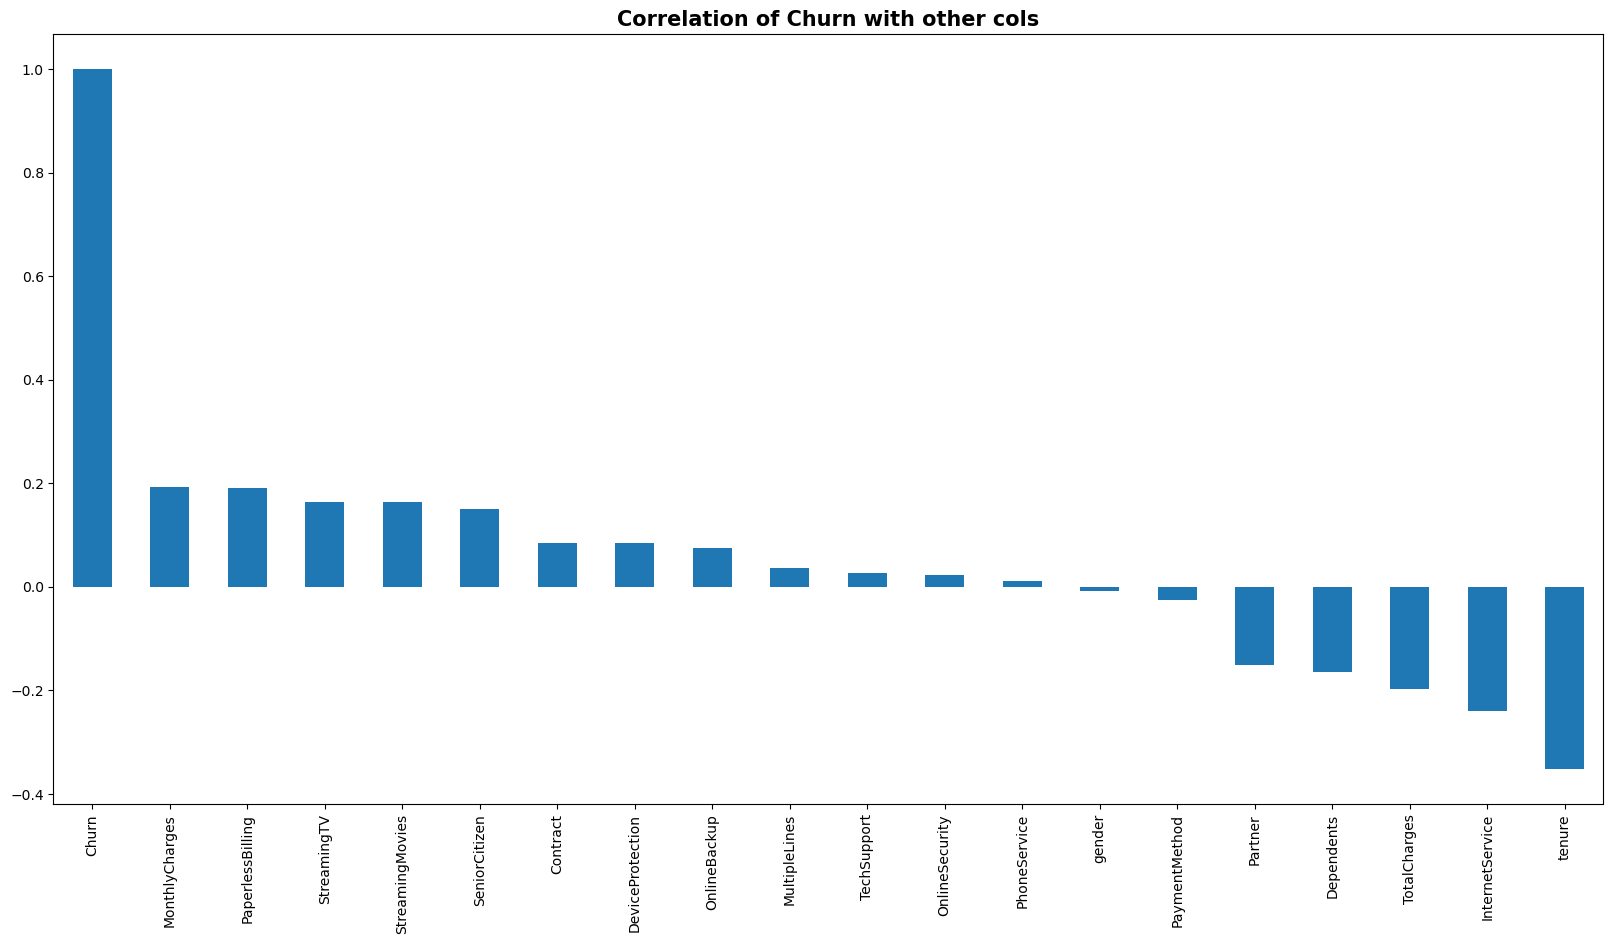

In [25]:
plt.figure(figsize=(20,10))
plt.title('Correlation of Churn with other cols', fontsize=15 ,weight='bold')
dataf.corr()['Churn'].sort_values(ascending = False).plot(kind='bar')

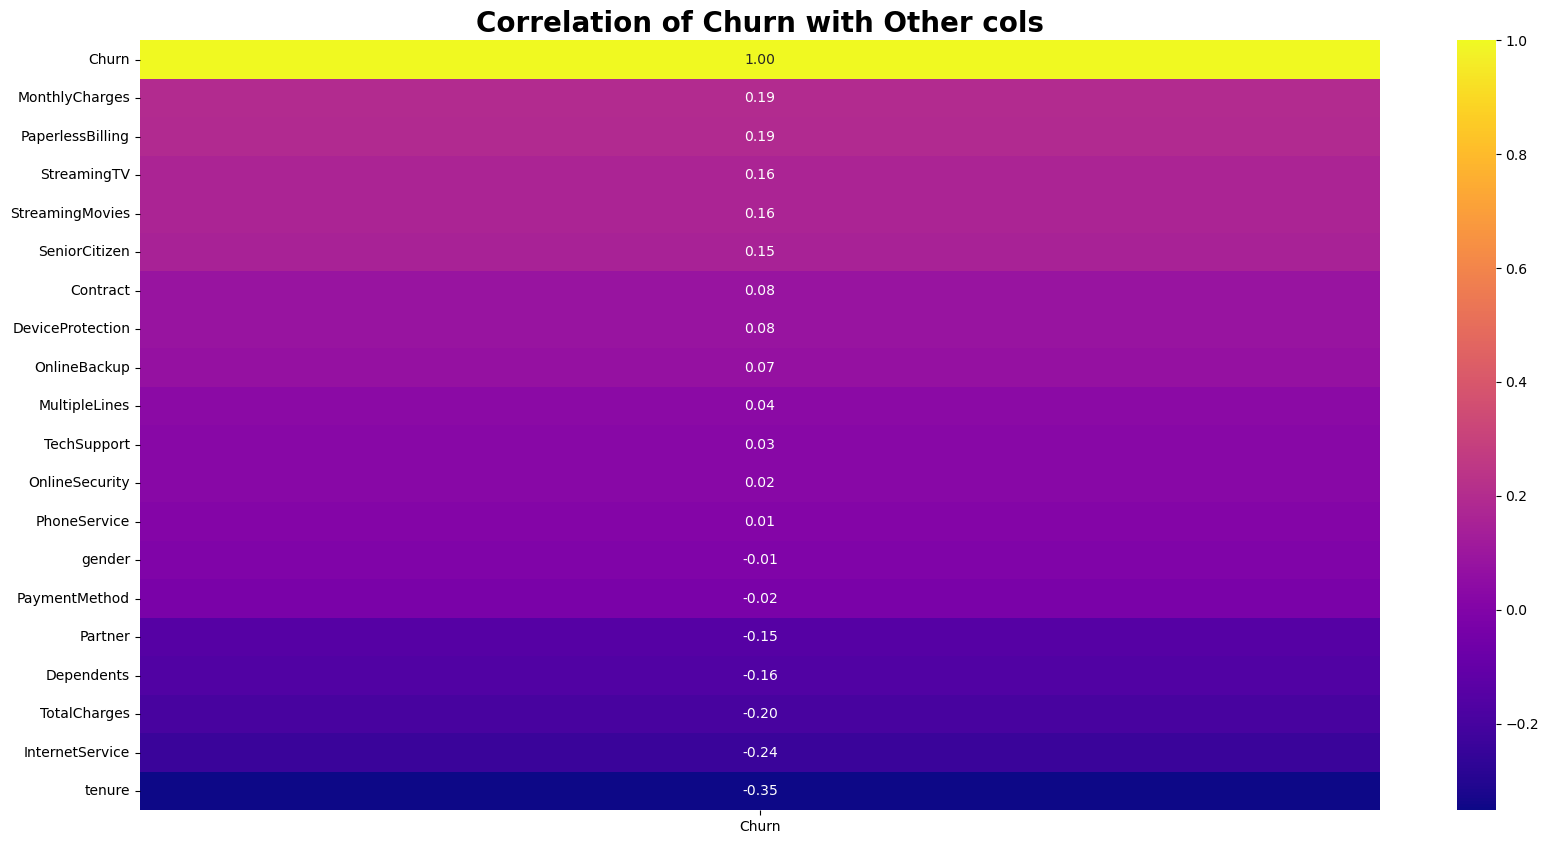

In [26]:
# Calculate the correlation matrix
correlation_matrix = dataf.corr()

# Create the heatmap
plt.figure(figsize=(20,10))
sns.heatmap(correlation_matrix[['Churn']].sort_values(by='Churn', ascending=False), annot=True, cmap='plasma', fmt='.2f')

# Adding title
plt.title('Correlation of Churn with Other cols', fontsize=20, weight='bold')
plt.show()

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate churn rates by contract type
contract_churn = data.groupby('Contract')['Churn'].agg(['mean', 'count'])
contract_churn = contract_churn.rename(columns={'mean': 'ChurnRate', 'count': 'TotalCustomers'})
contract_churn = contract_churn.sort_values('ChurnRate', ascending=False)
print(contract_churn)

          ChurnRate  TotalCustomers
Contract                           
 0         0.427097            3875
 1         0.112695            1473
-1         0.028319            1695


In [28]:
# Top correlated features (absolute value)
important_features = [
    'tenure', 
    'InternetService',
    'TotalCharges', 
    'Contract',
    'SeniorCitizen',
    'OnlineSecurity',
    'TechSupport'
]

dataimp = dataf[important_features]  # Filter columns
y= data["Churn"]

In [29]:
dataimp.head()

,tenure,InternetService,TotalCharges,Contract,SeniorCitizen,OnlineSecurity,TechSupport
0,1,1,29.85,0,0,0,0
1,34,1,1889.50,1,0,1,0
2,2,1,108.15,0,0,1,0
3,45,1,1840.75,1,0,1,1
4,2,-1,151.65,0,0,0,0


In [44]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier  # Best for imbalanced data(our data is imbalanced) 
from sklearn.metrics import classification_report

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(dataimp, y, test_size=0.2, random_state=42)

# Initialize and train model
model = GradientBoostingClassifier(
    n_estimators=150,
    learning_rate=0.1,
    max_depth=4
)
model.fit(X_train, y_train)

# Evaluate
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1036
           1       0.65      0.53      0.59       373

    accuracy                           0.80      1409
   macro avg       0.75      0.72      0.73      1409
weighted avg       0.79      0.80      0.79      1409



In [45]:
!pip install xgboost

In [46]:
neg_pos_ratio = (y_train == 0).sum() / (y_train == 1).sum()
print(f"Imbalance ratio (negative:positive): {neg_pos_ratio:.2f}")

Imbalance ratio (negative:positive): 2.77


In [47]:
from sklearn.ensemble import GradientBoostingClassifier
import numpy as np

# Calculate sample weights to handle imbalance
neg_pos_ratio = (y_train == 0).sum() / (y_train == 1).sum()
sample_weights = np.where(y_train == 1, neg_pos_ratio, 1)  # Higher weight for minority class

model = GradientBoostingClassifier( 
    n_estimators=170,
    learning_rate=0.05,
    max_depth=4,
    subsample=0.8,
    random_state=42
)

model.fit(X_train, y_train, sample_weight=sample_weights)
from sklearn.metrics import classification_report
print(classification_report(y_test, model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.92      0.74      0.82      1036
           1       0.53      0.81      0.64       373

    accuracy                           0.76      1409
   macro avg       0.72      0.77      0.73      1409
weighted avg       0.81      0.76      0.77      1409



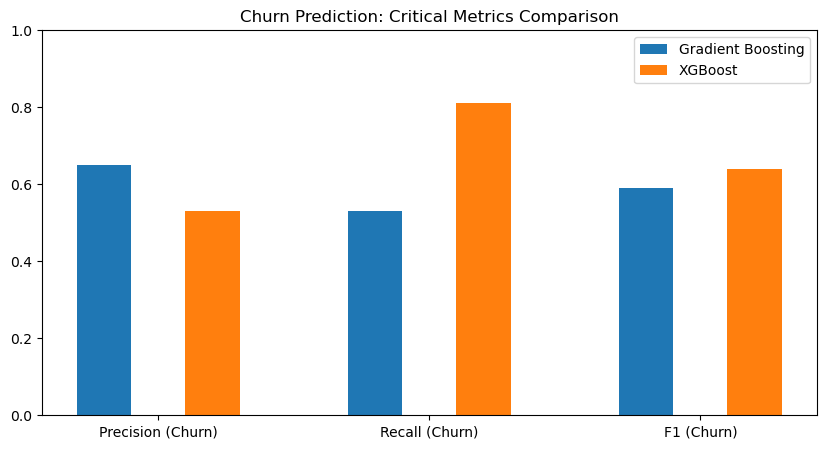

In [52]:

metrics = ['Precision (Churn)', 'Recall (Churn)', 'F1 (Churn)']
gbm_scores = [0.65, 0.53, 0.59] #from above calculations 
xgb_scores = [0.53, 0.81, 0.64]

plt.figure(figsize=(10, 5))
plt.bar(np.arange(3) - 0.2, gbm_scores, width=0.2, label='Gradient Boosting')
plt.bar(np.arange(3) + 0.2, xgb_scores, width=0.2, label='XGBoost')
plt.xticks(np.arange(3), metrics)
plt.ylim(0, 1)
plt.title('Churn Prediction: Critical Metrics Comparison')
plt.legend()
plt.show()

#XGBoost's 81% recall means it detects 4 out of 5 churners, crucial for retention efforts, while Gradient Boosting's higher accuracy (80%) reflects better overall stability
I prioritized recall because catching true churners is often more valuable than minimizing false alarms. With 81% recall, we can proactively retain 28% more at-risk customers compared to Gradient Boosting